In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
class GaussianMLE:
    def __init__(self, visualization=False):
        self.visualization = visualization
        if visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    def fit(self, data, classes):
        means = []
        std = []
        self.classes = np.unique(classes)
        for cl in self.classes:
            means.append(data[classes == cl].mean(axis=0))
            std.append(data[classes == cl].std(axis=0))
        self.means = np.array(means)
        self.std = np.array(std)
        
        if self.visualization:
            self.ax.scatter(data[:, 0], data[:, 1], c=classes, s=4)
    
    def predict(self, data):
        pred = []
        for vector in data:
            pred.append(self._predict_vector(vector))
        return np.array(pred)
    
    def accuracy(self, data, classes):
        pred = self.predict(data)
        return (pred == classes).mean()
    
    def _predict_vector(self, vector):
        features_probab = np.exp(-np.power((vector - self.means) / self.std, 2) / 2) / (self.std * np.sqrt(2 * np.pi))
        probabilities = features_probab.prod(axis=1)
        return self.classes[np.argmax(probabilities)]

## Example of using my GMLE

0.98666666666666669

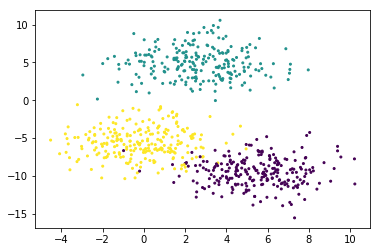

In [3]:
X, y = make_blobs(1000, n_features=2, centers=3, random_state=10, cluster_std=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

g_mle = GaussianMLE(True)
g_mle.fit(X_train, y_train)
g_mle.accuracy(X_test, y_test)

## Comparing with sklearn  

In [4]:
from sklearn.gaussian_process import GaussianProcessClassifier

gm = GaussianProcessClassifier()
gm.fit(X_train, y_train)
gm.score(X_test, y_test)

0.98999999999999999